In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop('RowNumber',axis=1,inplace=True)

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
df['Male']=pd.get_dummies(df['Gender'],drop_first=True)

In [10]:
df = pd.concat([df,df['Geography'].str.get_dummies()],axis=1)

In [11]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,1,0,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,1,0,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,1,0,0
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,0,1,0


In [12]:
df.drop(['CustomerId','Surname','Geography','Gender'],axis=1,inplace=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,0,1


In [14]:
x=df.drop('Exited',axis=1)
y=df['Exited']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain , xtest ,ytrain,yest =train_test_split(x,y, test_size=0.25,random_state=101)

In [17]:
x.shape


(10000, 12)

In [18]:
from keras.metrics import Precision,Recall

In [19]:
from keras.callbacks import EarlyStopping

In [23]:
es= EarlyStopping(patience=20)

In [24]:
model=Sequential()
model.add(Dense(activation='relu',input_shape=(12,),units=48))
model.add(Dense(activation='relu',units=48))
model.add(Dense(activation='relu',units=48))
model.add(Dense(activation='relu',units=48))
model.add(Dense(activation='relu',units=48))
model.add(Dense(activation='sigmoid',units = 1))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Precision(),Recall()])

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_7 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_8 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_9 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_10 (Dense)             (None, 48)                2352      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 49        
Total params: 10,081
Trainable params: 10,081
Non-trainable params: 0
__________________________________________________

In [26]:
h=model.fit(xtrain,ytrain,epochs=200,batch_size=10,callbacks=[es])

Epoch 1/200
750/750 [==============================] - 3s 1ms/step - loss: 163.2847 - accuracy: 0.6769 - precision_1: 0.2225 - recall_1: 0.2240
Epoch 2/200
750/750 [==============================] - 1s 1ms/step - loss: 13.5509 - accuracy: 0.6807 - precision_1: 0.2061 - recall_1: 0.2072
Epoch 3/200
750/750 [==============================] - 1s 967us/step - loss: 4.8640 - accuracy: 0.6794 - precision_1: 0.2123 - recall_1: 0.2130
Epoch 4/200
750/750 [==============================] - 1s 988us/step - loss: 3.1856 - accuracy: 0.6746 - precision_1: 0.2019 - recall_1: 0.2020
Epoch 5/200
750/750 [==============================] - 1s 964us/step - loss: 1.7533 - accuracy: 0.6950 - precision_1: 0.2309 - recall_1: 0.1990
Epoch 6/200
750/750 [==============================] - 1s 1ms/step - loss: 0.6377 - accuracy: 0.7508 - precision_1: 0.2299 - recall_1: 0.0982
Epoch 7/200
750/750 [==============================] - 1s 980us/step - loss: 1.1797 - accuracy: 0.7558 - precision_1: 0.1820 - recall_1: 0.

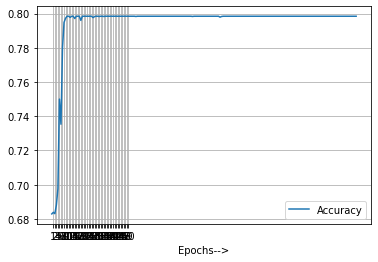

In [27]:
plt.plot(h.history['accuracy'])
plt.legend(['Accuracy'])
plt.grid()
plt.xticks(range(1,51))
plt.xlabel('Epochs-->')
plt.show()

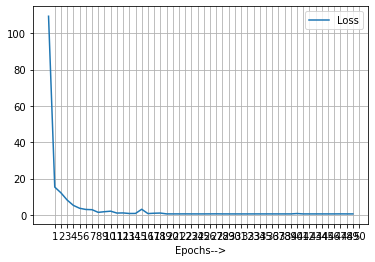

In [43]:
plt.plot(h.history['loss'])
plt.legend(['Loss'])
plt.grid()
plt.xticks(range(1,51))
plt.xlabel('Epochs-->')
plt.show()